- Divide data into independent and dependent
- split into train and test
- model training
- model prediction
- model evaluation 

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv('boston_house.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [12]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
df.duplicated().sum()

0

# Separate independent and dependent data

In [17]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [19]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df['MEDV']
X, y 

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
 1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
 2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
 3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
 4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
 501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
 502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
 503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
 504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
 505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   

# train and test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [26]:
y_train

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 404, dtype: float64

In [28]:
X_train.shape,X_test.shape

((404, 13), (102, 13))

In [30]:
y_train.shape,y_train.shape

((404,), (404,))

# Model training

In [35]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [47]:
pd.DataFrame(model.coef_ , index = X.columns , columns = ['Slopes'])

,Slopes
CRIM,-0.113056
ZN,0.030110
INDUS,0.040381
CHAS,2.784438
NOX,-17.202633
RM,4.438835
AGE,-0.006296
DIS,-1.447865
RAD,0.262430
TAX,-0.010647


# Model prediciton

In [56]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

X_train[:3]

In [60]:
y_train[:3]

477    12.0
15     19.9
332    19.4
Name: MEDV, dtype: float64

In [62]:
y_pred_train[:3]

array([10.96952405, 19.41196567, 23.06419602])

# Model Evaluation

In [67]:
def training_evaluation(actual,predicted) :
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    r2 = r2_score(actual,predicted)

    print(f'MSE:{mse}')
    print(f'RMSE:{rmse}')
    print(f'MAE:{mae}')
    print(f'R2_SCORE:{r2}')

    plt.scatter(actual,predicted , label = 'Actual price', color = 'red')
    plt.plot([actual.min(),predicted.max()],[actual.min(),predicted.max()],color = 'k' , label = 'Predicted price')
    plt.legend()
    plt.title('Best fit line - Train data')
    plt.xlabel('Actual price')
    plt.ylabel('Predicted price')

MSE:21.641412753226312
RMSE:4.6520331848801675
MAE:3.3147716267832292
R2_SCORE:0.7508856358979673


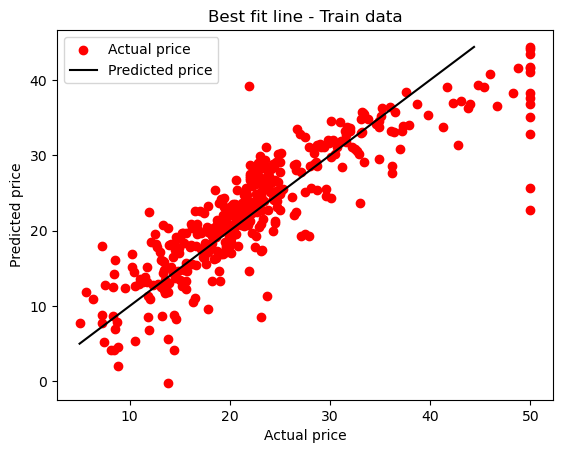

In [69]:
training_evaluation(y_train,y_pred_train)

MSE:24.291119474973534
RMSE:4.928602182665338
MAE:3.1890919658878505
R2_SCORE:0.6687594935356318


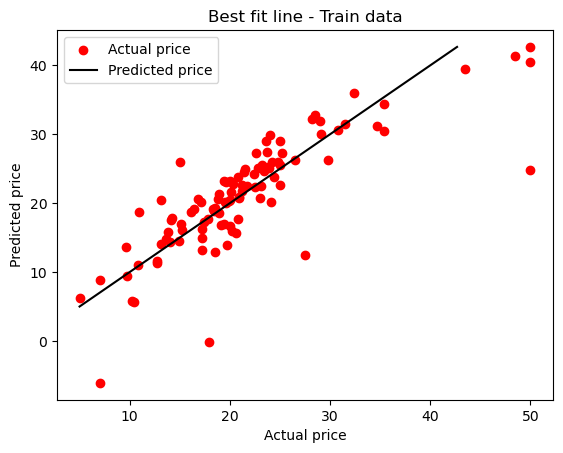

In [71]:
def test_evaluation(actual,predicted) :
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    r2 = r2_score(actual,predicted)

    print(f'MSE:{mse}')
    print(f'RMSE:{rmse}')
    print(f'MAE:{mae}')
    print(f'R2_SCORE:{r2}')

    plt.scatter(actual,predicted , label = 'Actual price', color = 'b')
    plt.plot([actual.min(),predicted.max()],[actual.min(),predicted.max()],color = 'k' , label = 'Predicted price')
    plt.legend()
    plt.title('Best fit line - Test data')
    plt.xlabel('Actual price')
    plt.ylabel('Predicted price')
training_evaluation(y_test,y_pred_test)

# Using Polynomial Regression

In [78]:
poly = PolynomialFeatures(degree = 2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [80]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [84]:
# Model training
poly = LinearRegression()
poly.fit(X_train_poly,y_train)

LinearRegression()

In [86]:
y_train_pred_poly = poly.predict(X_train_poly)
y_test_pred_poly = poly.predict(X_test_poly)

In [88]:
X_train[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83


In [90]:
y_train[:3]

477    12.0
15     19.9
332    19.4
Name: MEDV, dtype: float64

In [92]:
y_pred_train[:3]

array([10.96952405, 19.41196567, 23.06419602])

In [94]:
y_train_pred_poly[:3]

array([12.17599541, 19.13987792, 18.96086174])

MSE:5.314469592427889
RMSE:2.3053133393159135
MAE:1.7802666786578623
R2_SCORE:0.9388251253209016


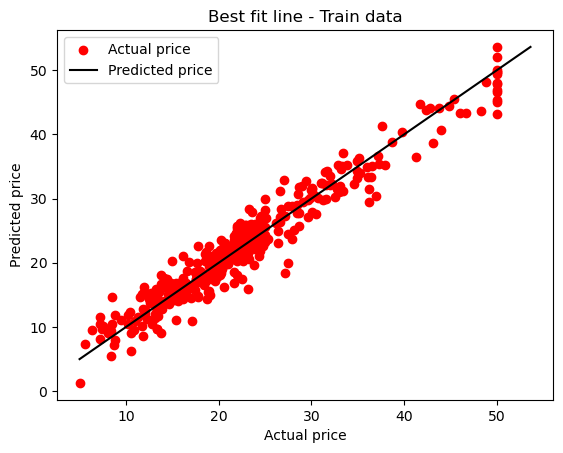

In [98]:
def training_evaluation(actual,predicted) :
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    r2 = r2_score(actual,predicted)

    print(f'MSE:{mse}')
    print(f'RMSE:{rmse}')
    print(f'MAE:{mae}')
    print(f'R2_SCORE:{r2}')

    plt.scatter(actual,predicted , label = 'Actual price', color = 'red')
    plt.plot([actual.min(),predicted.max()],[actual.min(),predicted.max()],color = 'k' , label = 'Predicted price')
    plt.legend()
    plt.title('Best fit line - Train data')
    plt.xlabel('Actual price')
    plt.ylabel('Predicted price')

training_evaluation(y_train,y_train_pred_poly)

MSE:14.183558215287713
RMSE:3.766106506099862
MAE:2.5879302673480082
R2_SCORE:0.8065890289025524


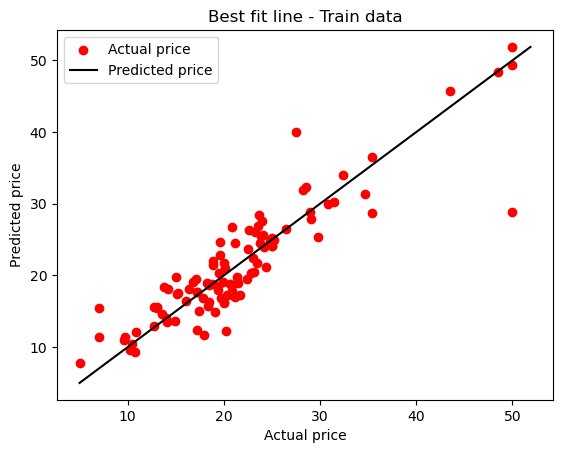

In [100]:
def test_evaluation(actual,predicted) :
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    r2 = r2_score(actual,predicted)

    print(f'MSE:{mse}')
    print(f'RMSE:{rmse}')
    print(f'MAE:{mae}')
    print(f'R2_SCORE:{r2}')

    plt.scatter(actual,predicted , label = 'Actual price', color = 'b')
    plt.plot([actual.min(),predicted.max()],[actual.min(),predicted.max()],color = 'k' , label = 'Predicted price')
    plt.legend()
    plt.title('Best fit line - Test data')
    plt.xlabel('Actual price')
    plt.ylabel('Predicted price')
training_evaluation(y_test,y_test_pred_poly)